## 图像数据

本次使用的图片为`lena.jpg`，图像来源于百度百科

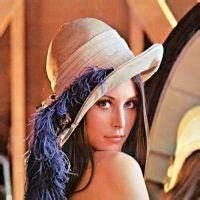

`Paddle`提供两种转换方式，一种是利用`functional`进行转换，类似于使用函数的方式。另一种是使用`Transform`方式，这种方式可以将所有的转换方法存入一个列表，使用更加方便。数据增强采用的图像格式为`PIL`，更多增强方式参见[官方文档](https://www.paddlepaddle.org.cn/documentation/docs/zh/2.0-rc1/api/paddle/vision/transforms/transforms/HueTransform_cn.html)

In [1]:
import numpy as np
from PIL import Image
from paddle.vision.transforms import functional as F
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## functional

In [2]:
image = Image.open('lena.jpg')

In [3]:
adjust_contrast_img = F.adjust_contrast(image, 0.4)
adjust_brightness_img = F.adjust_brightness(image, 0.4)
adjust_hue_img = F.adjust_hue(image, 0.4)
adjust_saturation_img = F.adjust_saturation(image, 0.4)
center_crop_img = F.center_crop(image, (150, 100))
cropped_img = F.crop(image, 56, 150, 200, 300)
flpped_img = F.hflip(image)

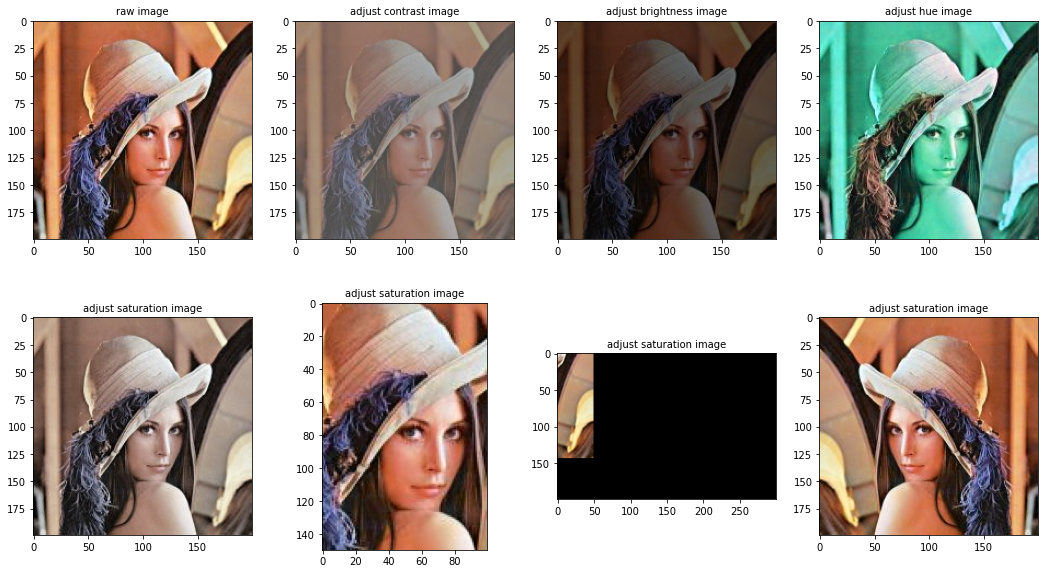

In [4]:
fig = plt.gcf()
fig.set_size_inches(18, 10)

ax_img = plt.subplot(2, 4, 1)
ax_img.imshow(image, cmap='binary')
ax_img.set_title('raw image',
                 fontsize=10)

ax_img = plt.subplot(2, 4, 2)
ax_img.imshow(adjust_contrast_img, cmap='binary')
ax_img.set_title('adjust contrast image',
                 fontsize=10)

ax_img = plt.subplot(2, 4, 3)
ax_img.imshow(adjust_brightness_img, cmap='binary')
ax_img.set_title('adjust brightness image',
                 fontsize=10)

ax_img = plt.subplot(2, 4, 4)
ax_img.imshow(adjust_hue_img, cmap='binary')
ax_img.set_title('adjust hue image',
                 fontsize=10)

ax_img = plt.subplot(2, 4, 5)
ax_img.imshow(adjust_saturation_img, cmap='binary')
ax_img.set_title('adjust saturation image',
                 fontsize=10)

ax_img = plt.subplot(2, 4, 6)
ax_img.imshow(center_crop_img, cmap='binary')
ax_img.set_title('adjust saturation image',
                 fontsize=10)

ax_img = plt.subplot(2, 4, 7)
ax_img.imshow(cropped_img, cmap='binary')
ax_img.set_title('adjust saturation image',
                 fontsize=10)

ax_img = plt.subplot(2, 4, 8)
ax_img.imshow(flpped_img, cmap='binary')
ax_img.set_title('adjust saturation image',
                 fontsize=10)

plt.show()

## Transform

In [5]:
from paddle.vision.transforms import *

In [6]:
image = Image.open('lena.jpg')

In [7]:
transform_list = [BrightnessTransform(0.4), CenterCrop(224), ColorJitter(0.4, 0.4, 0.4, 0.4), ContrastTransform(0.4),
                 Grayscale(), RandomCrop(176), HueTransform(0.4)]
transform_name_list = ['BrightnessTransform', 'CenterCrop', 'ColorJitter', 'ContrastTransform', 'Grayscale', 'RandomCrop', 'HueTransform']

In [8]:
transformed_image = [transform(image) for transform in transform_list]

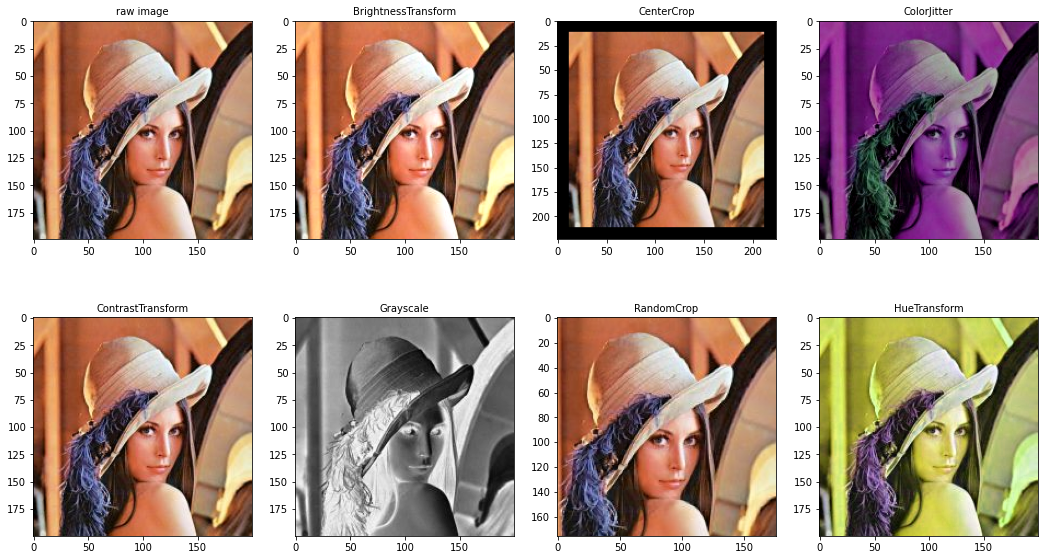

In [9]:
fig = plt.gcf()
fig.set_size_inches(18, 10)


ax_img = plt.subplot(2, 4, 1)
ax_img.imshow(image, cmap='binary')
ax_img.set_title('raw image',
                 fontsize=10)

for i in range(len(transformed_image)):
    ax_img = plt.subplot(2, 4, i+2)
    ax_img.imshow(transformed_image[i], cmap='binary')
    ax_img.set_title(transform_name_list[i],
                     fontsize=10)
plt.show()